# Statistical analysis of aggregate data

In [1]:
import sys
import os
current_dir = os.path.abspath('')
os.chdir(current_dir)
sys.path.append(os.path.join(current_dir,'..','code','BalancingControl'))

import two_stage_utils as tu
import inference as inf

torch threads 1
Running on device cpu


In [2]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import numpy as np
import pickle as pkl

In [3]:
results_folder = "results"

processed_data_folder = "processed_data"

summary_data_fname = "summary_data.csv"
summary_data_file = os.path.join(processed_data_folder, summary_data_fname)

statistics_folder = os.path.join(results_folder, "statistics")

scores_file_name = "scores.csv"
scores_file = os.path.join(statistics_folder, scores_file_name)

### read summary data

In [4]:
summary_df = pd.read_csv(summary_data_file)

summary_stayed_arr = [summary_df["rewarded common"], summary_df["rewarded rare"], summary_df["unrewarded common"], summary_df["unrewarded rare"]]

### plot repetitions of first stage actions

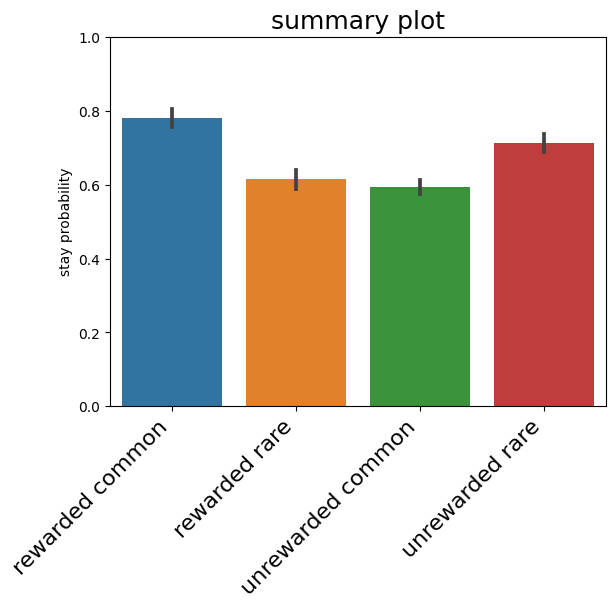

In [5]:
names = ["rewarded common", "rewarded rare", "unrewarded common", "unrewarded rare"]

plt.figure()
g = sns.barplot(data=summary_stayed_arr)
g.set_xticklabels(names, rotation=45, horizontalalignment='right', fontsize=16)
plt.ylim([0,1])
# plt.yticks(np.arange(0,1.1,0.2),fontsize=16)
plt.title("summary plot", fontsize=18)
plt.savefig(os.path.join(statistics_folder, "behavior_summary_plot.svg"),dpi=300)
plt.ylabel("stay probability")
plt.show()

### calculate and plot scores

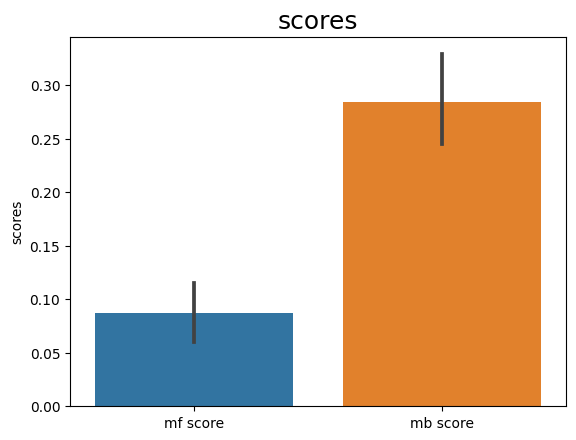

<Figure size 640x480 with 0 Axes>

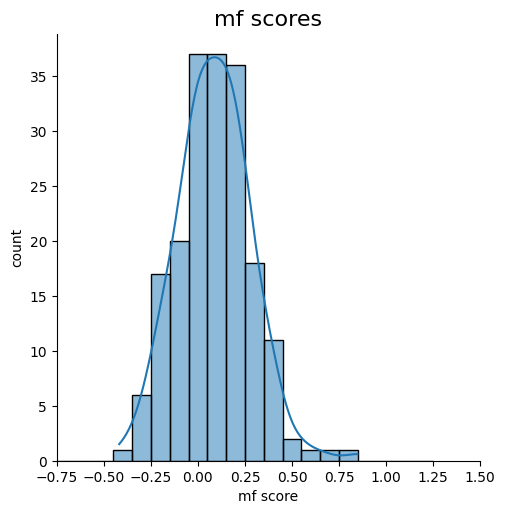

<Figure size 640x480 with 0 Axes>

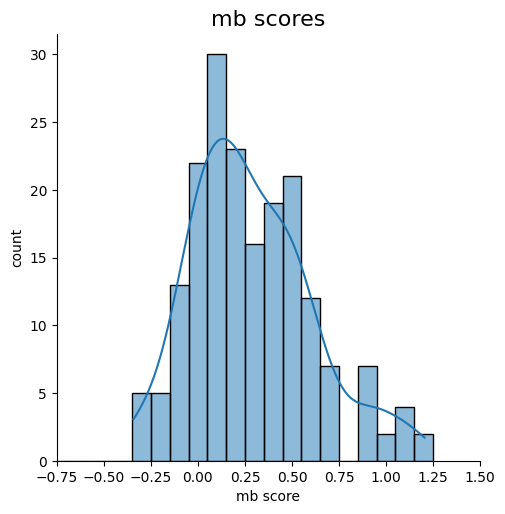

In [6]:
mf_score = summary_stayed_arr[0] + summary_stayed_arr[1] - summary_stayed_arr[2] - summary_stayed_arr[3]

mb_score = summary_stayed_arr[0] - summary_stayed_arr[1] - summary_stayed_arr[2] + summary_stayed_arr[3]

scores = pd.DataFrame({'mf score': mf_score, 'mb score': mb_score})

plt.figure()
g = sns.barplot(data=scores)
#plt.ylim([0,0.5])
# plt.yticks(np.arange(0,1.1,0.2),fontsize=16)
plt.title("scores", fontsize=18)
plt.savefig(os.path.join(statistics_folder, "behavior_scores.svg"),dpi=300)
plt.ylabel("scores")
plt.show()

plt.figure()
sns.displot(data=scores, x="mf score", kde=True, binrange=[-0.75,1.25], bins=20)
plt.xlim([-0.75,1.5])
#plt.ylim([0,0.5])
# plt.yticks(np.arange(0,1.1,0.2),fontsize=16)
plt.title("mf scores", fontsize=16)
plt.savefig(os.path.join(statistics_folder, "mf_scores.svg"),dpi=300)
plt.ylabel("count")
plt.show()

plt.figure()
sns.displot(data=scores, x="mb score", kde=True, binrange=[-0.75,1.25], bins=20)
plt.xlim([-0.75,1.5])
# plt.yticks(np.arange(0,1.1,0.2),fontsize=16)
plt.title("mb scores", fontsize=16)
plt.savefig(os.path.join(statistics_folder, "mb_scores.svg"),dpi=300)
plt.ylabel("count")
plt.show()

### check for relations between scores

In [7]:
#plt.figure()
#sns.jointplot(data=scores, x="mf score", y="mb score")
#plt.show()

<Figure size 640x480 with 0 Axes>

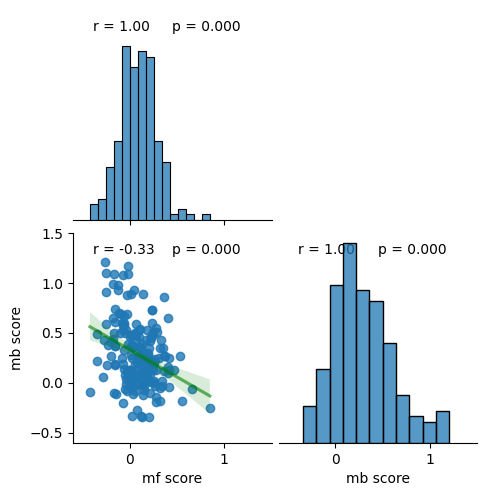

In [8]:
plt.figure()
vars_of_interest = ["mf score", "mb score"]
f = sns.pairplot(data=scores, kind='reg', diag_kind="hist", corner=True,
                    plot_kws={'line_kws': {'color': 'green', 'alpha': 0.6}},
                    vars=vars_of_interest)
f.map(tu.annot_corrfunc)
f.axes[1,0].set_xlim([-0.6, 1.5])
f.axes[1,0].set_ylim([-0.6, 1.5])
f.axes[1,1].set_xlim([-0.6, 1.5])
plt.savefig(os.path.join(statistics_folder, "scores.svg"))
plt.show()

### save scores to file

In [9]:
scores.to_csv(scores_file)